# 一起来打怪之 Credit Scoring 练习

-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [3]:
# 检查数据维度
data.shape

(112915, 11)

In [4]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [6]:
# 清除缺失值
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

In [7]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06742876076872101

### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [8]:
#使用数据集划分函数，设置测试集比例30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape #查看训练集和测试集

((76053, 10), (32595, 10), (76053,), (32595,))

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

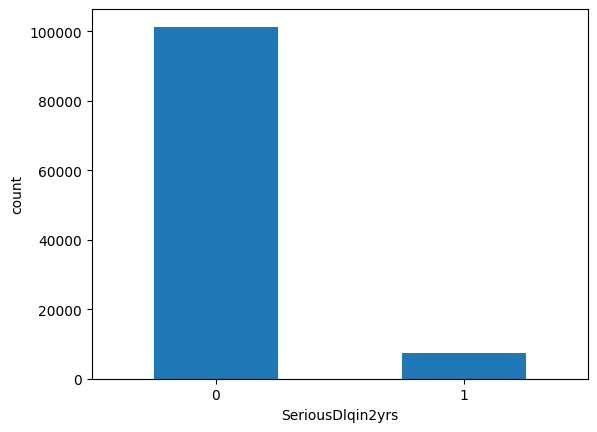

In [90]:
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
# 提示：value_counts
z=y.value_counts()
z
# 绘制两种类别的柱状图
# 提示：dataframe可以直接plot(kind='bar')
import matplotlib.pyplot as plt
z.plot(kind='bar')
plt.ylabel('count')
plt.xticks(rotation=0)

#### 2.数据预处理之离散化

In [9]:
# 请对年龄按照3岁一个区间进行离散化
# 提示：可以先计算出分桶边界，再基于pandas的cut函数进行离散化(分箱、分桶)
import numpy as np
max_age=X['age'].max()
min_age=X['age'].min()
max_age=int(max_age)
min_age=int(min_age)
section=list(range(min_age, max_age+3, 3))
X.age=pd.cut(X.age,section)
X.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,"(42, 45]",2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0.957151,"(39, 42]",0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0.658180,"(36, 39]",1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0.233810,"(27, 30]",0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0.907239,"(48, 51]",1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


#### 3.数据预处理之独热向量编码

In [10]:
# 请对上述分箱后的年龄段进行独热向量编码
# 提示：使用pandas的get_dummies完成
X=pd.get_dummies(X,columns=['age'],prefix_sep='_',dummy_na=False,drop_first=False)
X.head()

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"age_(0, 3]","age_(3, 6]","age_(6, 9]","age_(9, 12]","age_(12, 15]","age_(15, 18]","age_(18, 21]","age_(21, 24]","age_(24, 27]","age_(27, 30]","age_(30, 33]","age_(33, 36]","age_(36, 39]","age_(39, 42]","age_(42, 45]","age_(45, 48]","age_(48, 51]","age_(51, 54]","age_(54, 57]","age_(57, 60]","age_(60, 63]","age_(63, 66]","age_(66, 69]","age_(69, 72]","age_(72, 75]","age_(75, 78]","age_(78, 81]","age_(81, 84]","age_(84, 87]","age_(87, 90]","age_(90, 93]","age_(93, 96]","age_(96, 99]","age_(99, 102]","age_(102, 105]"
0,0.766127,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0.957151,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0.658180,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0.233810,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,0.907239,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### 4.数据预处理之幅度缩放

In [11]:
# 请对连续值特征进行幅度缩放
# 提示：可以使用StandardScaler等幅度缩放器进行处理
from sklearn.preprocessing import StandardScaler
stan=StandardScaler()
X_train_std=stan.fit_transform(X_train)
X_test_std=stan.transform(X_test)
X_train_std.shape

(76053, 10)

#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [110]:
# 提示：fit建模，建完模之后可以取出coef属性
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train_std, y_train)

# 获取系数
coefficients = lr.coef_

# 打印系数
print(coefficients)
indices=np.argsort(coefficients[0])[::-1]
feat_labels=data.columns[1:]
for f in range(X_train_std.shape[1]):
    print('%2d) %-*s %f'%(f,40,feat_labels[indices[f]],coefficients[0,indices[f]]))

[[-0.01432049 -0.36429241  1.71660158  0.31218901 -0.1151493  -0.09207822
   1.6638969  -0.19674368 -3.21071999  0.11659033]]
 0) NumberOfTime30-59DaysPastDueNotWorse     1.716602
 1) NumberOfTimes90DaysLate                  1.663897
 2) DebtRatio                                0.312189
 3) NumberOfDependents                       0.116590
 4) RevolvingUtilizationOfUnsecuredLines     -0.014320
 5) NumberOfOpenCreditLinesAndLoans          -0.092078
 6) MonthlyIncome                            -0.115149
 7) NumberRealEstateLoansOrLines             -0.196744
 8) age                                      -0.364292
 9) NumberOfTime60-89DaysPastDueNotWorse     -3.210720


#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [114]:
# 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参
from sklearn.model_selection import GridSearchCV

param_grid={
    'C':[1,10,100,500],
    'penalty':['l1','l2']
}
gs = GridSearchCV(lr, param_grid, cv=5)
gs.fit(X_train_std, y_train) 

/root/miniconda3/envs/ictp-ap/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/root/miniconda3/envs/ictp-ap/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/root/miniconda3/envs/ictp-ap/lib/python3.10/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/root/miniconda3/envs/ictp-ap/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1169, in fit


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=200),
             param_grid={'C': [1, 10, 100, 500], 'penalty': ['l1', 'l2']})

In [116]:
# 输出最好的超参数
# 输出最好的模型
print('Beet estimator:', gs.best_estimator_)
print("Best parameters:", gs.best_params_)
print("Best score:", gs.best_score_)

Beet estimator: LogisticRegression(C=10, max_iter=200)
Best parameters: {'C': 10, 'penalty': 'l2'}
Best score: 0.9330729850465064


#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

混淆矩阵:
 [[30350    74]
 [ 2083    88]]
准确度: 0.93382420616659
精确度: 0.5432098765432098
召回率: 0.04053431598341778
auc: 0.6982778965623033
f1 score: 0.07543934847835405


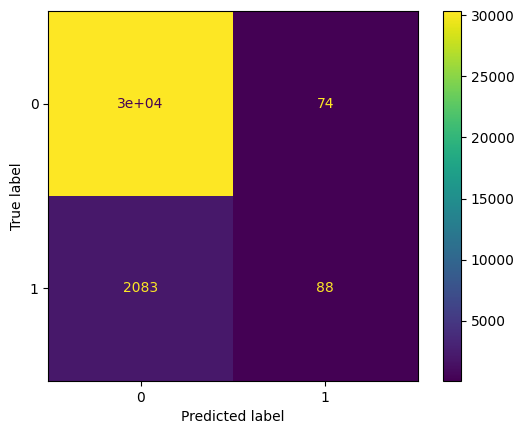

In [149]:
# 提示：在测试集上预测可以使用predict
# 提示：各种指标可以在sklearn.metrics中查到各种评估指标，分别是accuracy_score、recall_score、auc、confusion_matrix、f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score,roc_auc_score

y_pred = lr.predict(X_test_std)
y_pred_proba = lr.predict_proba(X_test_std)[:, 1]

accuracy = accuracy_score(y_test, y_pred) # 计算准确度
precision = precision_score(y_test, y_pred) # 计算精确度
recall = recall_score(y_test, y_pred) # 计算召回率
auc = roc_auc_score(y_test, y_pred_proba) #计算auc
f1 = f1_score(y_test, y_pred) #f1 score
cm = confusion_matrix(y_test, y_pred) # 混淆矩阵
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

print("混淆矩阵:\n",cm)
print("准确度:",accuracy)
print("精确度:",precision)
print("召回率:",recall)
print("auc:",auc)
print("f1 score:",f1)

#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [125]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for threshold in thresholds:
    y_pred_adjusted = (lr.predict_proba(X_test_std)[:,1] > threshold).astype(int)
    y_pred_lr=y_pred_adjusted
    accuracy = accuracy_score(y_test, y_pred_lr) # 计算准确度
    precision = precision_score(y_test, y_pred_lr) # 计算精确度
    recall = recall_score(y_test, y_pred_lr) # 计算召回率
    cm = confusion_matrix(y_test, y_pred_lr) # 混淆矩阵
    print("threshold=%d",threshold)
    print("准确度:",accuracy)
    print("精确度:",precision)
    print("召回率:",recall)
    print("混淆矩阵:\n",cm)
    print("\n")

threshold=%d 0.1
准确度: 0.8513882497315539
精确度: 0.2016075016744809
召回率: 0.4159373560571165
混淆矩阵:
 [[26848  3576]
 [ 1268   903]]


threshold=%d 0.2
准确度: 0.9280564503758245
精确度: 0.4095634095634096
召回率: 0.18148318747121142
混淆矩阵:
 [[29856   568]
 [ 1777   394]]


threshold=%d 0.3
准确度: 0.9336094493020402
精确度: 0.5078651685393258
召回率: 0.1040994933210502
混淆矩阵:
 [[30205   219]
 [ 1945   226]]


threshold=%d 0.4
准确度: 0.9341310016873754
精确度: 0.5476190476190477
召回率: 0.06356517733763242
混淆矩阵:
 [[30310   114]
 [ 2033   138]]


threshold=%d 0.5
准确度: 0.93382420616659
精确度: 0.5432098765432098
召回率: 0.04053431598341778
混淆矩阵:
 [[30350    74]
 [ 2083    88]]


threshold=%d 0.6
准确度: 0.93382420616659
精确度: 0.5660377358490566
召回率: 0.027637033625057577
混淆矩阵:
 [[30378    46]
 [ 2111    60]]


threshold=%d 0.7
准确度: 0.9336094493020402
精确度: 0.5522388059701493
召回率: 0.01704283740211884
混淆矩阵:
 [[30394    30]
 [ 2134    37]]


threshold=%d 0.8
准确度: 0.9335480901978831
精确度: 0.5675675675675675
召回率: 0.009672961768770152
混淆矩阵

#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

In [150]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel
coefficients = lr.coef_.ravel() 
feature_names = X_train.columns

coef_df = pd.DataFrame(
    {'Feature': feature_names, 
     'Coefficient': coefficients, 
     'Absolute Coefficient': abs(coefficients)
    })

# 根据coef输出绝对值大小排序
sorted_coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)
sorted_coef_df

,Feature,Coefficient,Absolute Coefficient
8,NumberOfTime60-89DaysPastDueNotWorse,-3.210720,3.210720
2,NumberOfTime30-59DaysPastDueNotWorse,1.716602,1.716602
6,NumberOfTimes90DaysLate,1.663897,1.663897
1,age,-0.364292,0.364292
3,DebtRatio,0.312189,0.312189
7,NumberRealEstateLoansOrLines,-0.196744,0.196744
9,NumberOfDependents,0.116590,0.116590
4,MonthlyIncome,-0.115149,0.115149
5,NumberOfOpenCreditLinesAndLoans,-0.092078,0.092078
0,RevolvingUtilizationOfUnsecuredLines,-0.014320,0.014320


In [153]:
# 使用RFE进行特征选择
from sklearn.feature_selection import RFE

lr_RFE = RFE(estimator=lr, n_features_to_select=5)
lr_RFE.fit(X_train_std, y_train)
y_pred = lr_RFE.predict(X_test_std)
selected_features = pd.DataFrame(X_train_std, columns=feature_names).columns[lr_RFE.support_]
print("Selected features:\n", selected_features)

Selected features:
 Index(['age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse'],
      dtype='object')


混淆矩阵:
 [[30358    66]
 [ 2088    83]]
准确度: 0.9339162448228255
精确度: 0.5570469798657718
召回率: 0.03823122984799632
auc: 0.6982778965623033
f1 score: 0.07155172413793104


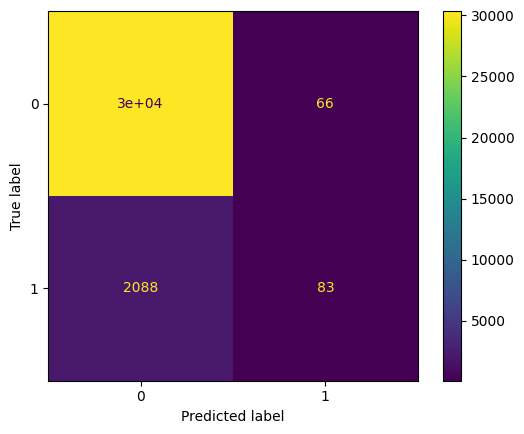

In [154]:
accuracy = accuracy_score(y_test, y_pred) # 计算准确度
precision = precision_score(y_test, y_pred) # 计算精确度
recall = recall_score(y_test, y_pred) # 计算召回率
auc = roc_auc_score(y_test, y_pred_proba) #计算auc
f1 = f1_score(y_test, y_pred) #f1 score
cm = confusion_matrix(y_test, y_pred) # 混淆矩阵
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

print("混淆矩阵:\n",cm)
print("准确度:",accuracy)
print("精确度:",precision)
print("召回率:",recall)
print("auc:",auc)
print("f1 score:",f1)

对比发现，当只选择5个重要度最高的特征后，删除了其他重要度很低的特征，发现结果变化不大，和之前的结果几乎一样。说明筛选重要的特征并删除不重要的特征对于模型预测结果影响不大。

#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

In [14]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

class RandomForestClassifierWithCoef(RandomForestClassifier):
    def fit(self, *args, **kwargs):
        super(RandomForestClassifierWithCoef, self).fit(*args, **kwargs)
        self.coef_ = self.feature_importances_

forest = RandomForestClassifierWithCoef(criterion='entropy', 
                                n_estimators=10, # The number of trees in the forest.
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train_std, y_train)


# 获取系数
coefficients = forest.coef_

# 打印系数
print(coefficients)
indices=np.argsort(coefficients[0])[::-1]
feat_labels=data.columns[1:]
# for f in range(X_train_std.shape[1]):
#     print('%2d) %-*s %f'%(f,40,feat_labels[indices[f]],coefficients[0,indices[f]]))

param_grid = {
    'n_estimators': [10, 50, 100, 200],  # 树的数量
    'max_depth': [None, 10, 20, 30],  # 树的最大深度
    'min_samples_split': [2, 4, 6],  # 分裂内部节点所需的最小样本数
    'random_state': [42]
}
gs = GridSearchCV(forest, param_grid, cv=5)
gs.fit(X_train_std, y_train) 

# 输出最好的超参数
# 输出最好的模型
print('Beet estimator:', gs.best_estimator_)
print("Best parameters:", gs.best_params_)
print("Best score:", gs.best_score_)

# y_pred = forest.predict(X_test_std)
# y_pred_proba = forest.predict_proba(X_test_std)[:, 1]

# accuracy = accuracy_score(y_test, y_pred) # 计算准确度
# precision = precision_score(y_test, y_pred) # 计算精确度
# recall = recall_score(y_test, y_pred) # 计算召回率
# auc = roc_auc_score(y_test, y_pred_proba) #计算auc
# f1 = f1_score(y_test, y_pred) #f1 score
# cm = confusion_matrix(y_test, y_pred) # 混淆矩阵
# cmd = ConfusionMatrixDisplay(cm)
# cmd.plot()

# print("混淆矩阵:\n",cm)
# print("准确度:",accuracy)
# print("精确度:",precision)
# print("召回率:",recall)
# print("auc:",auc)
# print("f1 score:",f1)

# coefficients = forest.coef_.ravel() 
# feature_names = X_train.columns

# coef_df = pd.DataFrame(
#     {'Feature': feature_names, 
#      'Coefficient': coefficients, 
#      'Absolute Coefficient': abs(coefficients)
#     })

# # 根据coef输出绝对值大小排序
# sorted_coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)
# sorted_coef_df

from sklearn.feature_selection import RFE

KNN_RFE = RFE(estimator=lr, n_features_to_select=5)
KNN_RFE.fit(X_train_std, y_train)
y_pred = KNN_RFE.predict(X_test_std)
selected_features = pd.DataFrame(X_train_std, columns=feature_names).columns[KNN_RFE.support_]
print("Selected features:\n", selected_features)


accuracy = accuracy_score(y_test, y_pred) # 计算准确度
precision = precision_score(y_test, y_pred) # 计算精确度
recall = recall_score(y_test, y_pred) # 计算召回率
auc = roc_auc_score(y_test, y_pred_proba) #计算auc
f1 = f1_score(y_test, y_pred) #f1 score
cm = confusion_matrix(y_test, y_pred) # 混淆矩阵
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

print("混淆矩阵:\n",cm)
print("准确度:",accuracy)
print("精确度:",precision)
print("召回率:",recall)
print("auc:",auc)
print("f1 score:",f1)

[0.21163404 0.12134321 0.06467451 0.16466129 0.15536265 0.08874733
 0.08437134 0.03016923 0.03772193 0.04131448]


KeyboardInterrupt: 

In [ ]:
# 支持向量机
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
SVC = LinearSVC()
SVC.fit(X_train_std, y_train)


# 获取系数
coefficients = SVC.coef_

# 打印系数
# print(coefficients)
# indices=np.argsort(coefficients[0])[::-1]
# feat_labels=data.columns[1:]
# for f in range(X_train_std.shape[1]):
#     print('%2d) %-*s %f'%(f,40,feat_labels[indices[f]],coefficients[0,indices[f]]))

param_grid = {
    'n_estimators': [10, 50, 100, 200],  # 树的数量
    'max_depth': [None, 10, 20, 30],  # 树的最大深度
    'min_samples_split': [2, 4, 6],  # 分裂内部节点所需的最小样本数
    'random_state': [42]
}
gs = GridSearchCV(forest, param_grid, cv=5)
gs.fit(X_train_std, y_train) 

# 输出最好的超参数
# 输出最好的模型
print('Beet estimator:', gs.best_estimator_)
print("Best parameters:", gs.best_params_)
print("Best score:", gs.best_score_)

y_pred = SVC.predict(X_test_std)
y_pred_proba = SVC.predict_proba(X_test_std)[:, 1]

accuracy = accuracy_score(y_test, y_pred) # 计算准确度
precision = precision_score(y_test, y_pred) # 计算精确度
recall = recall_score(y_test, y_pred) # 计算召回率
auc = roc_auc_score(y_test, y_pred_proba) #计算auc
f1 = f1_score(y_test, y_pred) #f1 score
cm = confusion_matrix(y_test, y_pred) # 混淆矩阵
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

print("混淆矩阵:\n",cm)
print("准确度:",accuracy)
print("精确度:",precision)
print("召回率:",recall)
print("auc:",auc)
print("f1 score:",f1)

coefficients = SVC.coef_.ravel() 
feature_names = X_train.columns

coef_df = pd.DataFrame(
    {'Feature': feature_names, 
     'Coefficient': coefficients, 
     'Absolute Coefficient': abs(coefficients)
    })

# 根据coef输出绝对值大小排序
sorted_coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)
sorted_coef_df

from sklearn.feature_selection import RFE

SVC_RFE = RFE(estimator=SVC, n_features_to_select=5)
SVC_RFE.fit(X_train_std, y_train)
y_pred = SVC_RFE.predict(X_test_std)
selected_features = pd.DataFrame(X_train_std, columns=feature_names).columns[SVC_RFE.support_]
print("Selected features:\n", selected_features)


accuracy = accuracy_score(y_test, y_pred) # 计算准确度
precision = precision_score(y_test, y_pred) # 计算精确度
recall = recall_score(y_test, y_pred) # 计算召回率
auc = roc_auc_score(y_test, y_pred_proba) #计算auc
f1 = f1_score(y_test, y_pred) #f1 score
cm = confusion_matrix(y_test, y_pred) # 混淆矩阵
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

print("混淆矩阵:\n",cm)
print("准确度:",accuracy)
print("精确度:",precision)
print("召回率:",recall)
print("auc:",auc)
print("f1 score:",f1)

In [165]:
# K最近邻
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
KNN.fit(X_train_std, y_train)


#获取系数
coefficients = KNN.coef_

# 打印系数
print(coefficients)
indices=np.argsort(coefficients[0])[::-1]
feat_labels=data.columns[1:]
for f in range(X_train_std.shape[1]):
    print('%2d) %-*s %f'%(f,40,feat_labels[indices[f]],coefficients[0,indices[f]]))

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # 邻居数
    'metric': ['euclidean', 'manhattan'],  # 距离度量
    'weights': ['uniform', 'distance']  # 权重函数
}
gs = GridSearchCV(KNN, param_grid, cv=5)
gs.fit(X_train_std, y_train) 

# 输出最好的超参数
# 输出最好的模型
print('Beet estimator:', gs.best_estimator_)
print("Best parameters:", gs.best_params_)
print("Best score:", gs.best_score_)



KeyboardInterrupt: 

In [ ]:
y_pred = KNN.predict(X_test_std)
y_pred_proba = KNN.predict_proba(X_test_std)[:, 1]

accuracy = accuracy_score(y_test, y_pred) # 计算准确度
precision = precision_score(y_test, y_pred) # 计算精确度
recall = recall_score(y_test, y_pred) # 计算召回率
auc = roc_auc_score(y_test, y_pred_proba) #计算auc
f1 = f1_score(y_test, y_pred) #f1 score
cm = confusion_matrix(y_test, y_pred) # 混淆矩阵
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

print("混淆矩阵:\n",cm)
print("准确度:",accuracy)
print("精确度:",precision)
print("召回率:",recall)
print("auc:",auc)
print("f1 score:",f1)

coefficients = KNN.coef_.ravel() 
feature_names = X_train.columns

coef_df = pd.DataFrame(
    {'Feature': feature_names, 
     'Coefficient': coefficients, 
     'Absolute Coefficient': abs(coefficients)
    })

# 根据coef输出绝对值大小排序
sorted_coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)
sorted_coef_df

from sklearn.feature_selection import RFE

KNN_RFE = RFE(estimator=lr, n_features_to_select=5)
KNN_RFE.fit(X_train_std, y_train)
y_pred = KNN_RFE.predict(X_test_std)
selected_features = pd.DataFrame(X_train_std, columns=feature_names).columns[KNN_RFE.support_]
print("Selected features:\n", selected_features)


accuracy = accuracy_score(y_test, y_pred) # 计算准确度
precision = precision_score(y_test, y_pred) # 计算精确度
recall = recall_score(y_test, y_pred) # 计算召回率
auc = roc_auc_score(y_test, y_pred_proba) #计算auc
f1 = f1_score(y_test, y_pred) #f1 score
cm = confusion_matrix(y_test, y_pred) # 混淆矩阵
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

print("混淆矩阵:\n",cm)
print("准确度:",accuracy)
print("精确度:",precision)
print("召回率:",recall)
print("auc:",auc)
print("f1 score:",f1)